<h1 class="">Data Exploration</h1>
<h5 class="">Richter's Predictor: Modeling Earthquake Damage</h5>
<h5 class="">Competition hosted by <a href="https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/">Driven Data</a></h5>
<h5 class=""><a href="https://github.com/hss0727/driven_data_richters_predictor/blob/main/eda.ipynb">Github Repo for code</a></h5>



<br>
<br>
<h3>1. Introduction</h3>
<hr>
Nepal carried out surveys after the catastrophic earthquake in 2015, which resulted in around 9,000 casualties and more that 600,000 buildings being damaged. The goal is to <strong style="color: blue">predict the level of damage to buildings</strong> caused by the earthquake.
<br>
<br>

<h3>2. Initial Data Exploration</h3>
<hr>

<ul>
    <li>Number of observation: 347,469 (train: 260,601 | test: 86,868)</li>
    <li>Dependent variables: 39</li>
    <li>Number of classes: 3 -level of damage (1: low, 2: medium, 3: high)</li>
    <li>Missing values: none</li>
</ul>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import math

In [2]:
train_values = pd.read_csv("./data/train_values.csv")
train_labels = pd.read_csv("./data/train_labels.csv")
test_values =  pd.read_csv("./data/test_values.csv")

In [3]:
train_values.shape, train_labels.shape, test_values.shape

((260601, 39), (260601, 2), (86868, 39))

In [4]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

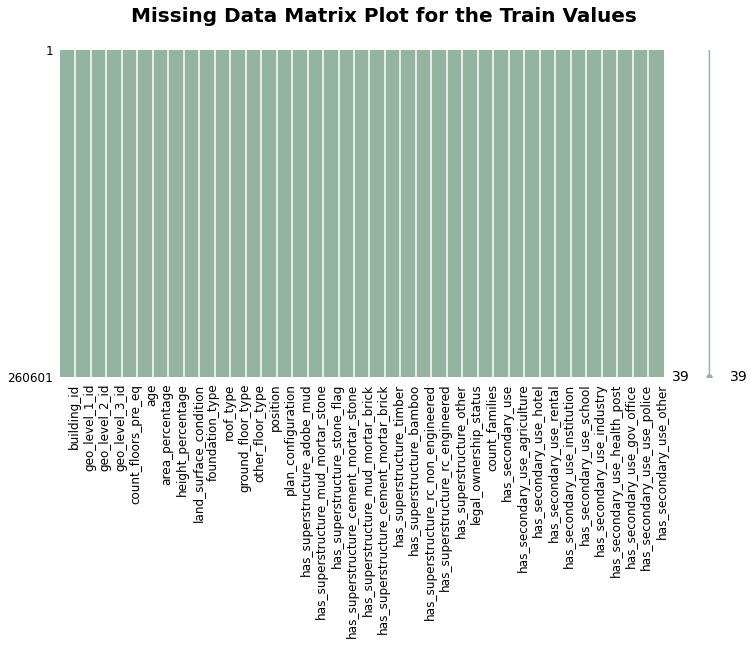

In [5]:
# Check for missing values
%matplotlib inline
mat = msno.matrix(train_values, figsize=(12,6), color=(148/255,180/255,159/255)) # Convert RGB to float (rgb: (148,180,159))
mat.tick_params(axis='x', rotation=90, 
                labelbottom=True, labeltop=False, labelsize=12)
mat.tick_params(axis='y', labelsize=12)

plt.suptitle("Missing Data Matrix Plot for the Train Values",
             fontsize=20, fontweight='bold')
plt.show()

<p>The feature selection process started with categorizing the variables into four factors that were hypothesized to have a relationship with damage level. The categories were geography, building structure, building materials, and building usage.</p>
<ul>
    <li>Geography: train_values - column 1:3 - 'geo_level_1_id' ~ 'geo_level_3_id'</li>
    <li>Building structure: train_values - column 4:14 - 'count_floors_pre_eq' ~ 'plan_configuration'</li>
    <li>Building materials: train_values - column 15:25 - 'has_superstructure_adobe_mud' ~ 'has_superstructure_other'</li>
    <li>Building usage: train_values - column 26:38 - 'legal_ownership_status' ~ 'has_secondary_use_other'</li>
</ul>    
<br>
<br>

<h3>2-1. Geography - Building location</h3>
<hr>
<p>There were three main geographical variables that represented building location: “geo_level_1_id”, “geo_level_2_id”, and “geo_level_3_id”, which could loosely be interpreted as representing the building’s town (level 1), district (level 2), and street (level 3). Since the values are not coordinate system numbers such as latitude and longitude, they do not provide information on the actual positions of buildings on a map. As such, their encodings provide <strong style="color: blue">less interpretability for humans and likely less understandability for a model.</strong></p>

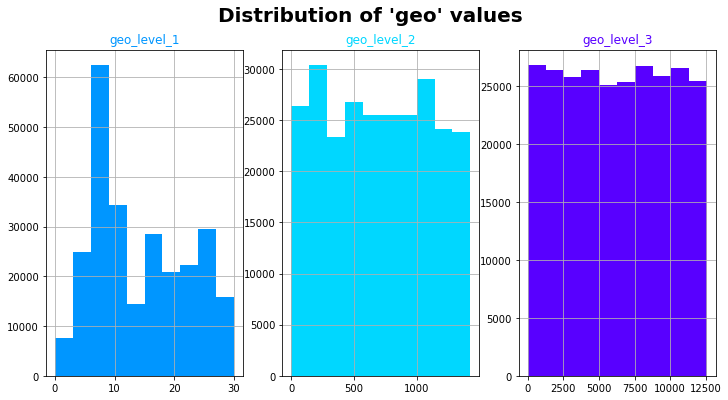

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
axes[0].hist(train_values['geo_level_1_id'], color="#0096FF")
axes[1].hist(train_values['geo_level_2_id'], color="#00D7FF")
axes[2].hist(train_values['geo_level_3_id'], color="#5800FF")

axes[0].set_title("geo_level_1", color="#0096FF")
axes[1].set_title("geo_level_2", color="#00D7FF")
axes[2].set_title("geo_level_3", color="#5800FF")

plt.suptitle("Distribution of 'geo' values",
             fontsize=20, fontweight='bold')

axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

plt.show()

<br>
<br>
<h3>2-2. Building Structure</h3>
<hr>


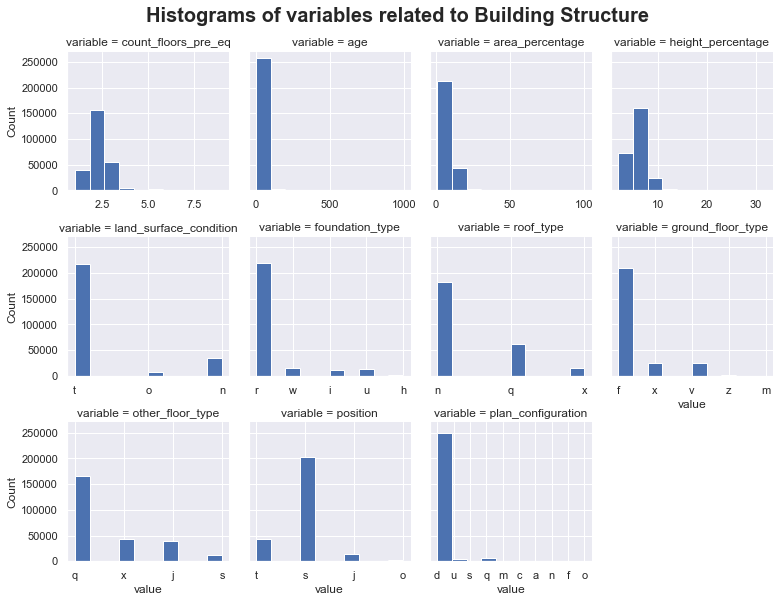

In [7]:
struct_df = train_values.iloc[:,4:15]
struct = struct_df.melt() # Pivot longer

sns.set(style="darkgrid")
g = sns.FacetGrid(struct, col="variable", height=2.7, aspect=1,
                  col_wrap=4, despine=True, sharex=False)
g = g.map(plt.hist, "value")
g.set_axis_labels(y_var="Count")
g.figure.suptitle("Histograms of variables related to Building Structure",
                  y=1.03, fontsize=20, fontweight='bold')
plt.show()

<br>
<br>
<h3>2-3. Building Materials</h3>
<hr>


In [8]:
material_df = train_values.iloc[:,15:26]
material = material_df.melt() # Pivot longer

In [9]:
material['variable'] = material['variable'].apply(
    func = lambda x : x.replace("has_superstructure_",""))

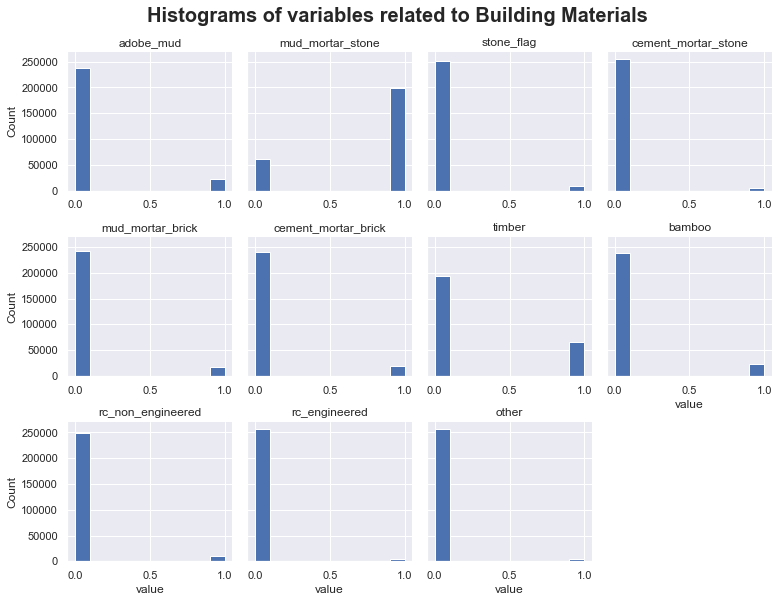

In [10]:
g = sns.FacetGrid(material, col="variable", height=2.7, aspect=1,
                  col_wrap=4, despine=True, sharex=False)
g = g.map(plt.hist, "value")
g.set_titles('{col_name}')
g.set_axis_labels(y_var="Count")
g.figure.suptitle("Histograms of variables related to Building Materials",
                  y=1.03, fontsize=20, fontweight='bold')
plt.show()

<br>
<br>
<h3>2-4. Building Usage</h3>
<hr>


In [11]:
usage_df = train_values.iloc[:,26:39]
usage = usage_df.melt() # Pivot longer

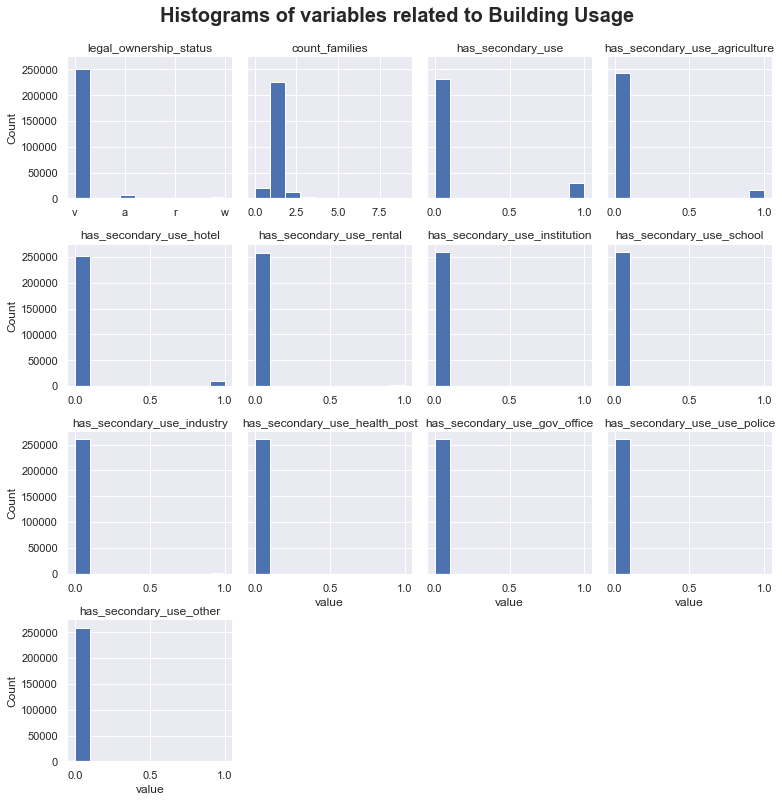

In [12]:
g = sns.FacetGrid(usage, col="variable", height=2.7, aspect=1,
                  col_wrap=4, despine=True, sharex=False)
g = g.map(plt.hist, "value")
g.set_titles('{col_name}')
g.set_axis_labels(y_var="Count")
g.figure.suptitle("Histograms of variables related to Building Usage",
                  y=1.03, fontsize=20, fontweight='bold')
plt.show()

<br>
<br>
<h3>2-5. Level of Damage</h3>
<hr>


<br>
<br>
<h3>3. Merge Data & Labels</h3>
<hr>


In [22]:
train_values.shape, train_labels.shape

((260601, 39), (260601, 2))

In [16]:
train_df = train_values.merge(train_labels, how="left")

In [21]:
train_df.shape

(260601, 40)

In [24]:
train_df.to_csv("./data/merged_train_data.csv")